In [4]:
import pandas as pd

#  1. MNIST Data 

In [5]:
import os
os.getcwd()

'C:\\Users\\HP\\PCA'

In [6]:
train = pd.read_csv("C:\\Users\\HP\\PCA\\mnist_train.csv")
print(train.shape)
train.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. Split feature vectors and labels


In [7]:
print(len(train))

60000


In [8]:
# Y is label
Y = train[['label']]

In [9]:
Y.shape

(60000, 1)

In [10]:
Y.head(2)

,label
0,5
1,0


In [11]:
# X is feature vectors
X = train

In [12]:
X.shape

(60000, 785)

In [13]:
X.drop('label', axis=1,inplace=True)

In [14]:
X.shape

(60000, 784)

In [15]:
X.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. rescaling feature vectors to all have the same scale

In [16]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [17]:
x_std.shape

(60000, 784)

# 4. Covariance Matrix of features

In [18]:
import numpy as np

In [19]:
# features are columns from x_std
features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 5. Eigen Vectors and Eigen Values from Covariance Matrix

In [20]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [21]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [22]:
print('Eigenvalues \n%s' %eig_vals)

Eigenvalues 
[ 4.04876351e+01  2.92416975e+01  2.68118045e+01  2.06866182e+01
  1.80766501e+01  1.57331779e+01  1.37906091e+01  1.25175891e+01
  1.10067953e+01  1.00504971e+01  9.62045779e+00  8.63097356e+00
  7.99159687e+00  7.81488215e+00  7.37553786e+00  7.13058751e+00
  6.71398002e+00  6.60400749e+00  6.40604846e+00  6.23737743e+00
  5.93229172e+00  5.76059855e+00  5.48403364e+00  5.31859721e+00
  5.12873534e+00  4.96062446e+00  4.90533662e+00  4.70843497e+00
  4.52919760e+00  4.39470849e+00  4.27522172e+00  4.21399693e+00
  4.09838079e+00  4.03181137e+00  3.97713624e+00  3.86052409e+00
  3.80864021e+00  3.72563426e+00  3.64393543e+00  3.44169730e+00
  3.41624517e+00  3.36378527e+00  3.25773631e+00  3.23620323e+00
  3.20478100e+00  3.17911021e+00  3.14205728e+00  3.08588859e+00
  3.06076556e+00  3.03759974e+00  2.90171955e+00  2.86408562e+00
  2.84980787e+00  2.82374220e+00  2.69168208e+00  2.71778127e+00
  2.76632955e+00  2.65850712e+00  2.61669482e+00  2.57622805e+00
  2.52662224

In [23]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
eig_vals[0] / sum(eig_vals)

0.05646716919741736

# 6. Project data point onto selected Eigen Vector


In [24]:
projected_X_1 = x_std.dot(eig_vecs.T[0])

In [25]:
projected_X_1

array([ 0.92215881, -8.70897698, -2.32838932, ...,  3.77721201,
       -1.72236917,  1.42725062])

In [26]:
projected_X_2 = x_std.dot(eig_vecs.T[1])
projected_X_2

array([-4.81479035, -7.75440302,  9.43133817, ..., -3.23056436,
       -4.94812525, -6.17538558])

In [27]:
projected_X_3 = x_std.dot(eig_vecs.T[2])
projected_X_3

array([-0.06755984,  3.44791044,  6.18411405, ...,  3.80619883,
       -0.00695123,  2.96768709])

In [28]:
result = pd.DataFrame(projected_X_1, columns=['PC1'])
result['PC2'] = pd.DataFrame(projected_X_2, columns=['PC2'])
result['PC3'] = pd.DataFrame(projected_X_3, columns=['PC3'])
result['label'] = Y

In [29]:
result.head(10)

,PC1,PC2,PC3,label
0,0.922159,-4.814790,-0.067560,5
1,-8.708977,-7.754403,3.447910,0
2,-2.328389,9.431338,6.184114,4
3,6.582173,-3.746318,-3.690851,1
4,5.183251,3.133297,6.277947,9
5,-2.198402,-3.068366,0.231257,2
6,6.773344,0.823079,-2.932370,1
7,-1.926909,-5.406264,0.163032,3
8,7.822335,0.191810,-1.100151,1
9,3.227626,-4.726425,4.288980,4


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

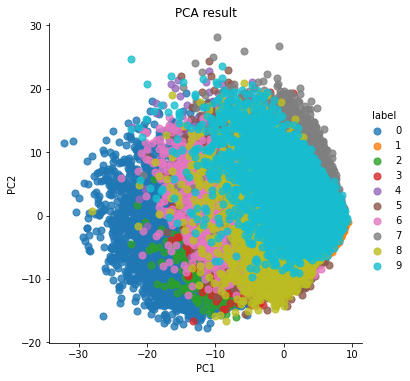

In [31]:
sns.lmplot('PC1', 'PC2', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color
# title
plt.title('PCA result')